# Mobility/Restaurant Data (International)
---

## Importing Datasets

In [1308]:
import pandas as pd

# First, create a Dataframe using the Apple mobility data
apple_mob_file = "../data/mobility-trends.csv"
apple_df = pd.read_csv(apple_mob_file)

apple_df.head()

,geo_type,region,transportation_type,date,value
0,country/region,Albania,driving,2020-01-13,100.00
1,country/region,Albania,driving,2020-01-14,95.30
2,country/region,Albania,driving,2020-01-15,101.43
3,country/region,Albania,driving,2020-01-16,97.20
4,country/region,Albania,driving,2020-01-17,103.55


In [1309]:
# Next, create a Dataframe using the Google mobility data. We can combine this with the Apple Dataframe later.
google_mob_file = "../data/regional-mobility.csv"
google_df = pd.read_csv(google_mob_file)

google_df.head()

,country,region,date,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,United Arab Emirates,Total,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,United Arab Emirates,Total,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,United Arab Emirates,Total,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,United Arab Emirates,Total,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,United Arab Emirates,Total,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [1310]:
# Now, create a Dataframe from the restaurant data.
restaurant_file = "../data/restaurant-performance-country.csv"
restaurant_df = pd.read_csv(restaurant_file, index_col=0)

restaurant_df.head()

,country,percent_yoy_change,date
region_type,,,
countries,Global,-1,2020-02-18
countries,Global,3,2020-02-19
countries,Global,-1,2020-02-20
countries,Global,-2,2020-02-21
countries,Global,1,2020-02-22


In [1311]:
# Finally, let's create a Dataframe of COVID-19 spread data for comparison.

covid_file = "../WHO-COVID-19-global-data.csv"
covid_df = pd.read_csv(covid_file)

covid_df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,1,1,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,1,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,1,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,1,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,1,0,0


---


## Cleaning and Combining Dataframes - Mobility

In [1312]:
# Let's combine the Apple and Google data into a single Dataframe
# First, let's sort the instances by country and remove instances without a country or that do not occur on a national level

apple_df = apple_df[apple_df.geo_type == 'country/region'] # Only keeps instances of countries, excludes cities
apple_df = apple_df.drop(columns=["geo_type"]) # Delete unnecessary column
apple_df = apple_df.rename(columns={"region": "country"}) # rename column for accuracy
# print(len(apple_df))

google_df = google_df[google_df.region == 'Total'] # Only keeps data for entire countries (not regions/cities)
google_df = google_df.drop(columns=["region"]) # Delete unnecessary column
# print(len(google_df))

# Now we can combine the two based on country value and date
mobility_df = pd.merge(apple_df, google_df, how="outer", on=["country", "date"])
mobility_df
# print(len(mobility_df))

,country,transportation_type,date,value,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Albania,driving,2020-01-13,100.00,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,walking,2020-01-13,100.00,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,driving,2020-01-14,95.30,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,walking,2020-01-14,100.68,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,driving,2020-01-15,101.43,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
20968,Zimbabwe,NaN,2020-04-13,NaN,-71.0,-63.0,-51.0,-83.0,-80.0,49.0
20969,Zimbabwe,NaN,2020-04-14,NaN,-63.0,-53.0,-47.0,-78.0,-64.0,41.0
20970,Zimbabwe,NaN,2020-04-15,NaN,-62.0,-50.0,-51.0,-77.0,-65.0,42.0
20971,Zimbabwe,NaN,2020-04-16,NaN,-62.0,-50.0,-48.0,-77.0,-64.0,42.0


In [1313]:
# Now, let's remove any rows with "null" values (this means they did not appear in both Dataframes)
mobility_df.dropna()

,country,transportation_type,date,value,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
276,Argentina,driving,2020-02-15,127.62,1.0,-3.0,-3.0,4.0,-1.0,0.0
277,Argentina,walking,2020-02-15,103.47,1.0,-3.0,-3.0,4.0,-1.0,0.0
278,Argentina,driving,2020-02-16,88.20,-6.0,-6.0,-14.0,-2.0,-4.0,2.0
279,Argentina,walking,2020-02-16,69.12,-6.0,-6.0,-14.0,-2.0,-4.0,2.0
280,Argentina,driving,2020-02-17,92.28,-10.0,-8.0,-23.0,-2.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...
16042,Vietnam,walking,2020-04-15,53.42,-57.0,-34.0,-37.0,-57.0,-19.0,16.0
16043,Vietnam,driving,2020-04-16,56.93,-54.0,-30.0,-34.0,-54.0,-16.0,13.0
16044,Vietnam,walking,2020-04-16,56.38,-54.0,-30.0,-34.0,-54.0,-16.0,13.0
16045,Vietnam,driving,2020-04-17,57.54,-51.0,-30.0,-35.0,-54.0,-25.0,18.0


In [1314]:
# TODO: combine driving/walking/transit from same date in same country

In [1315]:
# Now, let's add COVID data to the mobility Dataframe

covid_df = covid_df.drop(columns=[" Country_code", " WHO_region"]) # delete extraneous columns
covid_df = covid_df.rename(columns={"Date_reported": "date", " Country": "country"}) # Reformat column names to match mobility df

mobility_df = pd.merge(mobility_df, covid_df, how="outer", on=["country", "date"])
mobility_df = mobility_df.dropna() # Remove instances without both COVID and mobility data
mobility_df


,country,transportation_type,date,value,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
310,Argentina,driving,2020-03-03,88.90,0.0,5.0,-6.0,8.0,16.0,-1.0,1.0,1.0,0.0,0.0
311,Argentina,walking,2020-03-03,104.39,0.0,5.0,-6.0,8.0,16.0,-1.0,1.0,1.0,0.0,0.0
312,Argentina,driving,2020-03-04,92.74,-1.0,3.0,-1.0,8.0,18.0,-2.0,0.0,1.0,0.0,0.0
313,Argentina,walking,2020-03-04,108.23,-1.0,3.0,-1.0,8.0,18.0,-2.0,0.0,1.0,0.0,0.0
314,Argentina,driving,2020-03-05,97.45,1.0,4.0,-9.0,10.0,18.0,-1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15832,Uruguay,walking,2020-04-15,23.05,-52.0,-25.0,-69.0,-51.0,-36.0,18.0,0.0,483.0,1.0,8.0
15833,Uruguay,driving,2020-04-16,36.07,-53.0,-28.0,-65.0,-49.0,-34.0,18.0,9.0,492.0,0.0,8.0
15834,Uruguay,walking,2020-04-16,26.22,-53.0,-28.0,-65.0,-49.0,-34.0,18.0,9.0,492.0,0.0,8.0
15835,Uruguay,driving,2020-04-17,45.24,-52.0,-26.0,-66.0,-49.0,-32.0,19.0,1.0,493.0,1.0,9.0


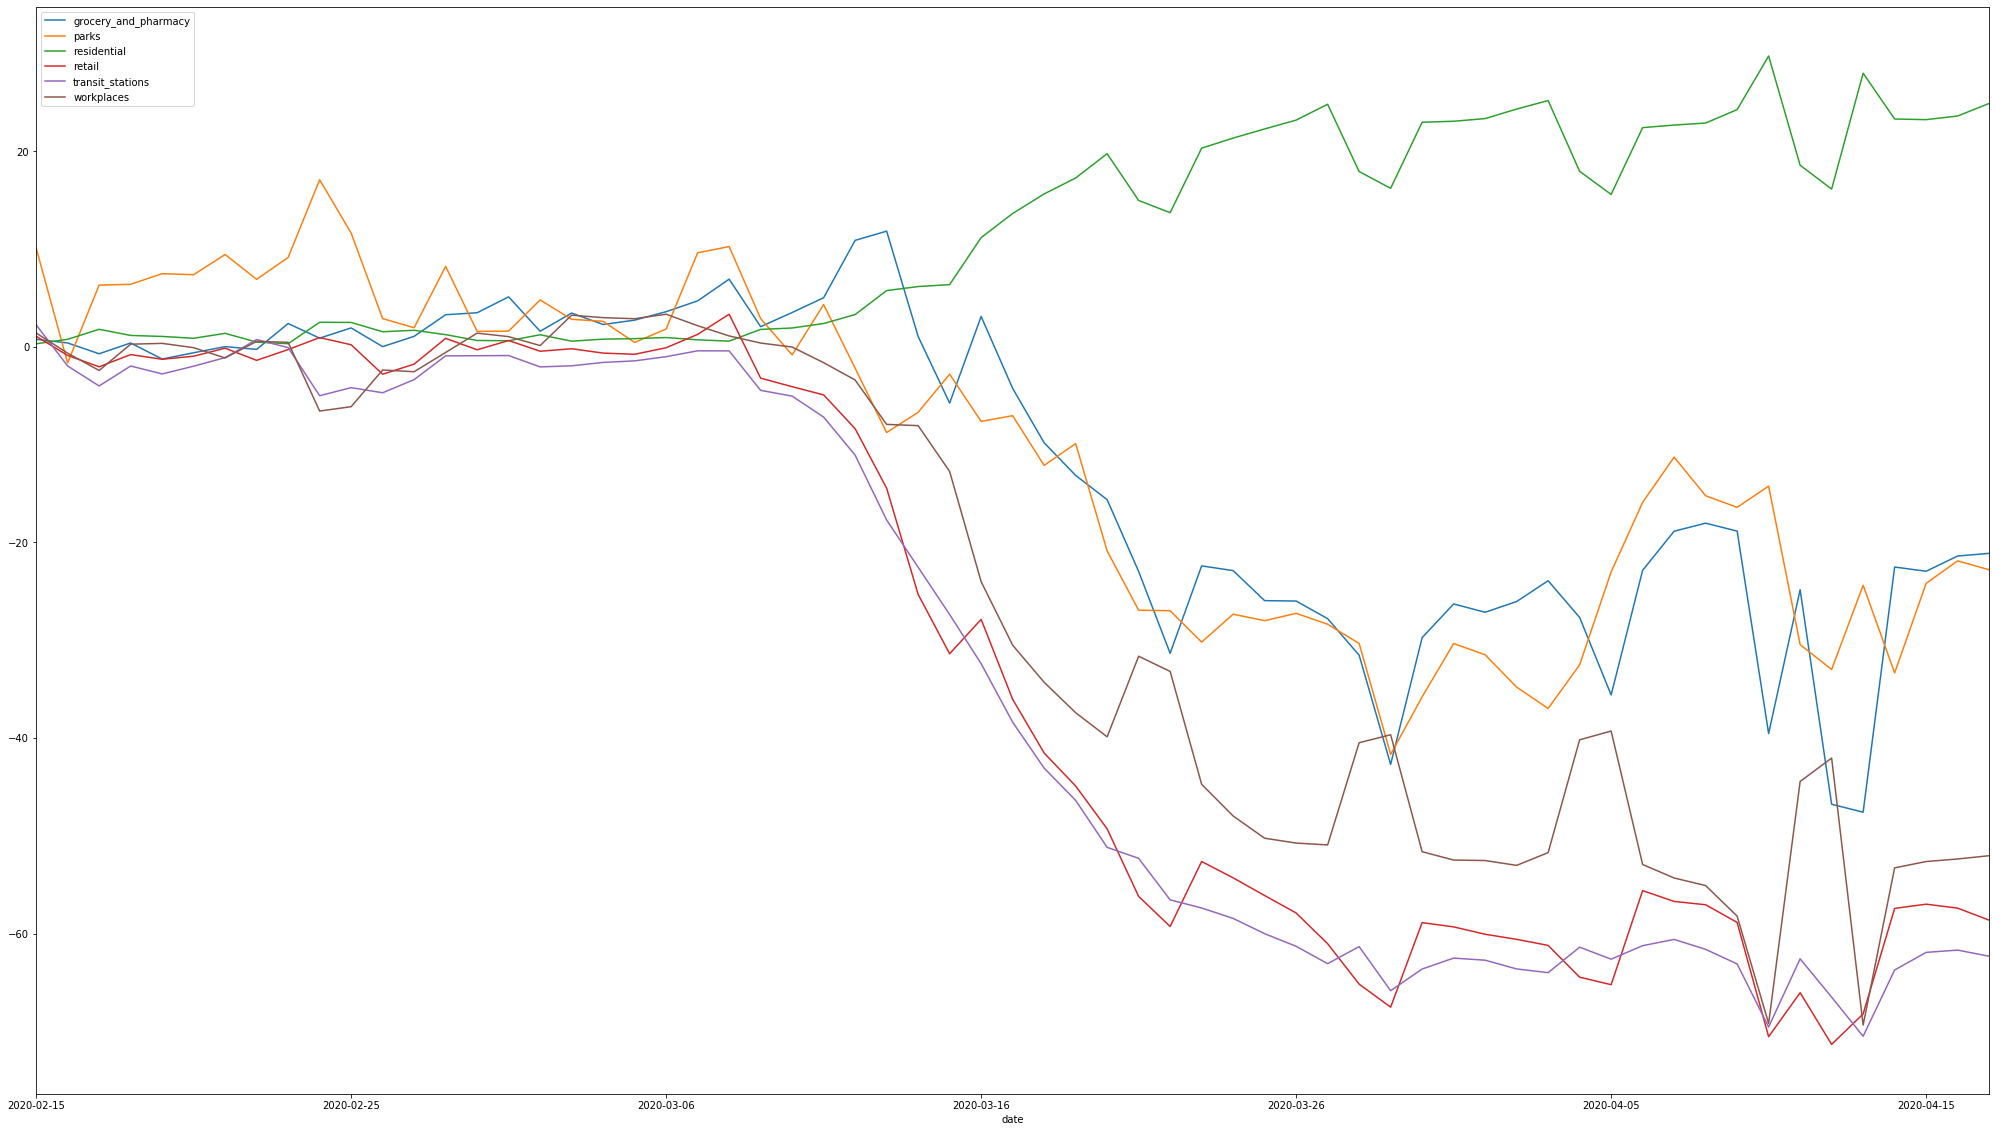

In [1316]:
# Just for reference, let's get a simple visualization of the mobility data over time

mobility_date = mobility_df.sort_index(level=["date"])
mobility_date['retail'] = mobility_date['retail'].astype('double') 
mobility_date['grocery_and_pharmacy'] = mobility_date['grocery_and_pharmacy'].astype('double') 
mobility_date['parks'] = mobility_date['parks'].astype('double') 
mobility_date['transit_stations'] = mobility_date['transit_stations'].astype('double') 
mobility_date['workplaces'] = mobility_date['workplaces'].astype('double') 
mobility_date['residential'] = mobility_date['residential'].astype('double') 
mobility_date = mobility_date.groupby(['date']).mean()

# Let's remove the "value" column and COVID case/death columns so that we can just see the different modes of mobility
mobility_date = mobility_date[mobility_date.columns.difference(['value', " Cumulative_cases", " Cumulative_deaths", " New_cases", " New_deaths"])]


mobility_date.plot(figsize=(35,20))

In [1317]:
# Out of curiosity, let's get a list of countries included in the above Dataframe, as well as the country count
import numpy as np

countries_list = mobility_df["country"].unique()
print("Number of countries included: ", len(countries_list), "\n", countries_list)

Number of countries included:  49 
 ['Argentina' 'Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria'
 'Cambodia' 'Canada' 'Chile' 'Colombia' 'Croatia' 'Denmark' 'Egypt'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'India'
 'Indonesia' 'Ireland' 'Israel' 'Italy' 'Japan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Malaysia' 'Mexico' 'Netherlands' 'New Zealand' 'Norway'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Saudi Arabia' 'Singapore'
 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkey' 'United Arab Emirates' 'Uruguay']


In [1318]:
# And let's see the date range we are working with now.
print("Start date: ", mobility_df.date.min(), "\nEnd date: ", mobility_df.date.max())

Start date:  2020-02-15 
End date:  2020-04-17


---


## Cleaning and Combining Dataframes - Restaurants

In [1319]:
# Let's see that restaurant dataframe again

restaurant_df

,country,percent_yoy_change,date
region_type,,,
countries,Global,-1,2020-02-18
countries,Global,3,2020-02-19
countries,Global,-1,2020-02-20
countries,Global,-2,2020-02-21
countries,Global,1,2020-02-22
...,...,...,...
countries,United States,-62,2020-07-10
countries,United States,-57,2020-07-11
countries,United States,-59,2020-07-12


In [1320]:
# We only want data for specific countries, so let's get rid of all the "Global" values, and also any rows with null values

restaurant_df.dropna() # drops any possible rows with null values
restaurant_df = restaurant_df[restaurant_df.country != 'Global'] # Only keeps instances of countries, excludes global data instances

restaurant_df

,country,percent_yoy_change,date
region_type,,,
countries,Australia,-3,2020-02-18
countries,Australia,-6,2020-02-19
countries,Australia,-3,2020-02-20
countries,Australia,-1,2020-02-21
countries,Australia,0,2020-02-22
...,...,...,...
countries,United States,-62,2020-07-10
countries,United States,-57,2020-07-11
countries,United States,-59,2020-07-12


In [1321]:
# Now, just like with the mobility data, let's add in data on COVID cases

restaurant_df = pd.merge(restaurant_df, covid_df, how="outer", on=["country", "date"])
restaurant_df = restaurant_df.dropna() # Remove instances without both COVID and restaurant data
restaurant_df

,country,percent_yoy_change,date,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Australia,-3.0,2020-02-18,0.0,15.0,0.0,0.0
1,Australia,-6.0,2020-02-19,0.0,15.0,0.0,0.0
2,Australia,-3.0,2020-02-20,0.0,15.0,0.0,0.0
3,Australia,-1.0,2020-02-21,2.0,17.0,0.0,0.0
4,Australia,0.0,2020-02-22,4.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...
733,Mexico,-79.0,2020-07-08,4902.0,261750.0,480.0,31119.0
734,Mexico,-78.0,2020-07-09,6258.0,268008.0,895.0,32014.0
735,Mexico,-74.0,2020-07-10,6995.0,275003.0,782.0,32796.0
736,Mexico,-75.0,2020-07-11,7280.0,282283.0,730.0,33526.0


In [1322]:
# Again, out of curiosity, let's find out which countries are included in this data

restaurant_countries_list = restaurant_df["country"].unique()
print("Number of countries included: ", len(restaurant_countries_list), "\n", restaurant_countries_list)

Number of countries included:  5 
 ['Australia' 'Canada' 'Germany' 'Ireland' 'Mexico']


Wow, that's a much smaller number of countries than we had in the mobility data!

In [1323]:
# And the date range
print("Start date: ", restaurant_df.date.min(), "\nEnd date: ", restaurant_df.date.max())


Start date:  2020-02-18 
End date:  2020-07-12


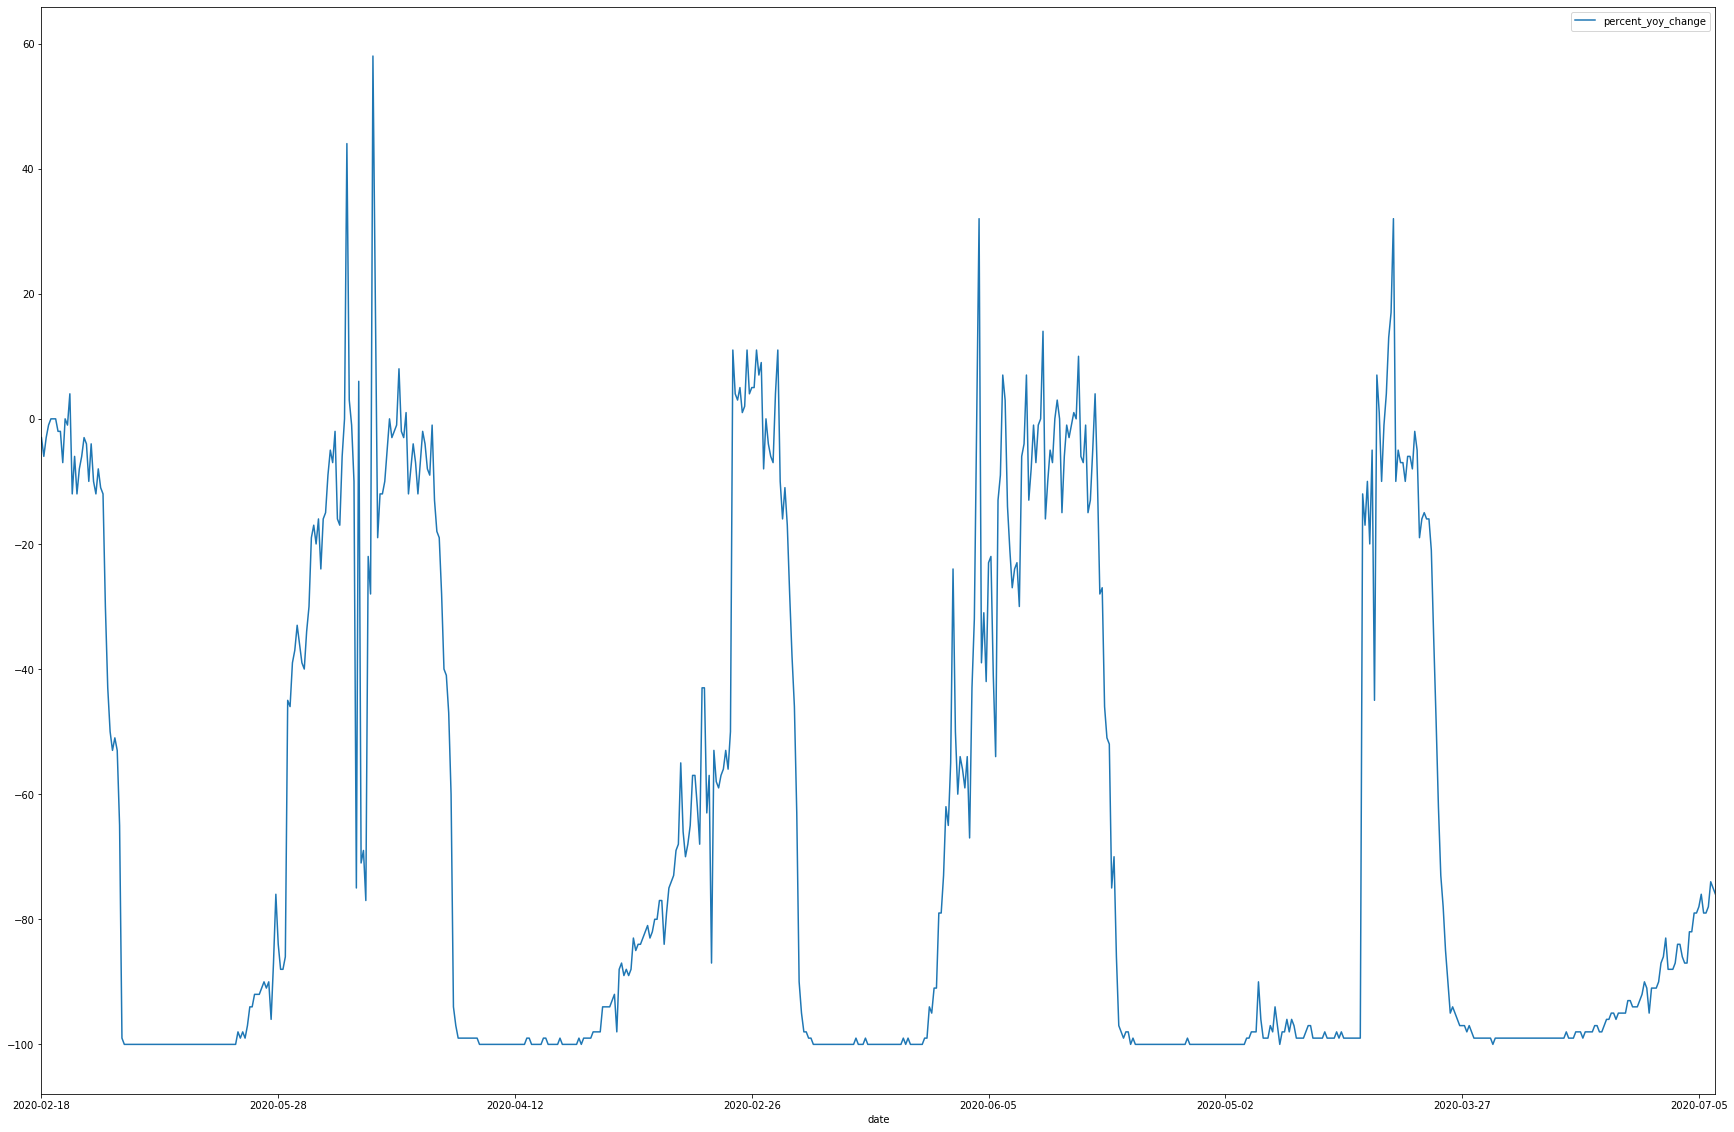

In [1324]:
# Just for reference, let's look at the time series data for restaurant performance across all countries

restaurant_df.plot("date", "percent_yoy_change", figsize=(30,20))

---


## Plotting the data - Mobility

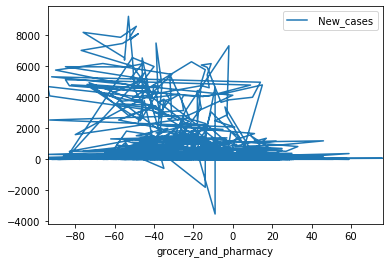

In [1325]:
# Let's start out plotting correlation between various types of mobility and new cases of COVID-19
# Note that this is on a global scale (we can break it up by country later)
# First, plotting grocery and pharmacy trips
mobility_df.plot("grocery_and_pharmacy", " New_cases")

In [1326]:
# Let's try breaking that down by month
feb_df = mobility_df[mobility_df["date"].str.contains("2020-02")]
march_df = mobility_df[mobility_df["date"].str.contains("2020-03")]
april_df = mobility_df[mobility_df["date"].str.contains("2020-04")]

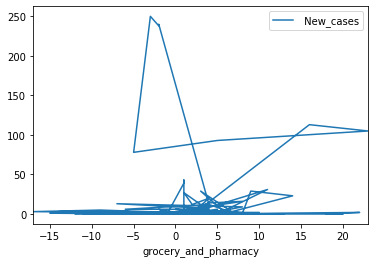

In [1327]:
feb_df.plot("grocery_and_pharmacy", " New_cases")

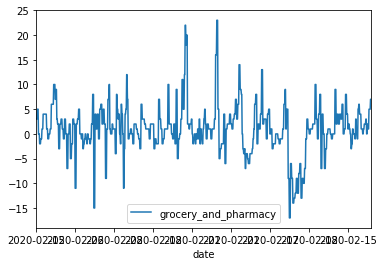

In [1328]:
# What did grocery/pharmacy trends look like overall in February?
feb_df.plot("date", "grocery_and_pharmacy")

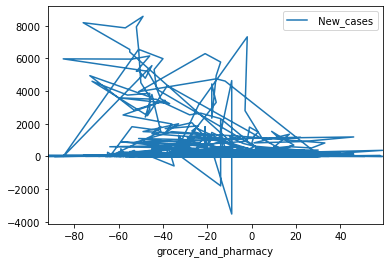

In [1329]:
march_df.plot("grocery_and_pharmacy", " New_cases")

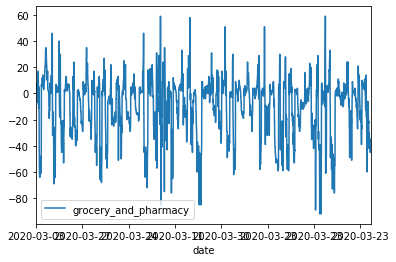

In [1330]:
march_df.plot("date", "grocery_and_pharmacy")

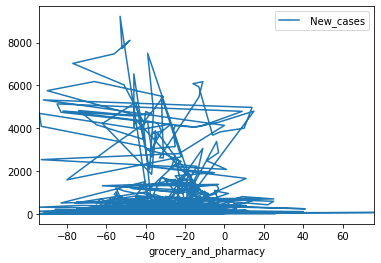

In [1331]:
april_df.plot("grocery_and_pharmacy", " New_cases")

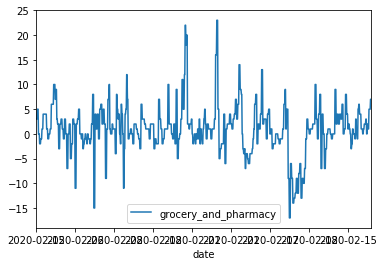

In [1332]:
feb_df.plot("date", "grocery_and_pharmacy")

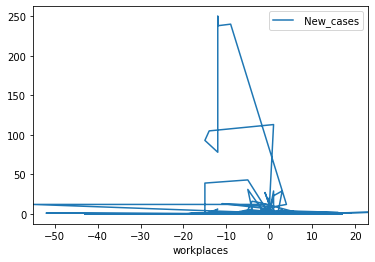

In [1333]:
# Let's try looking at workplace travel
feb_df.plot("workplaces", " New_cases")

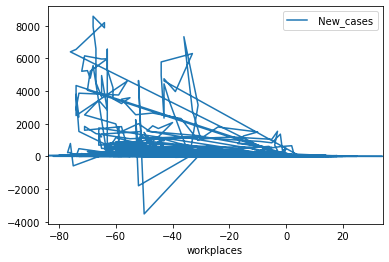

In [1334]:
march_df.plot("workplaces", " New_cases")

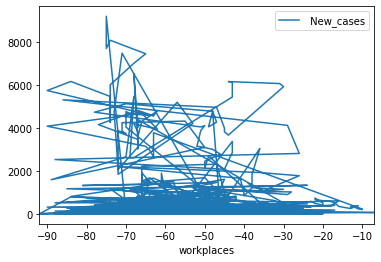

In [1335]:
april_df.plot("workplaces", " New_cases")

In [1336]:
# Maybe this will work better if I break it down by country as well. Let's use Italy as an example.
italy_feb_df = feb_df[feb_df["country"].str.contains("Italy")]
italy_march_df = march_df[march_df["country"].str.contains("Italy")]
italy_april_df = april_df[april_df["country"].str.contains("Italy")]

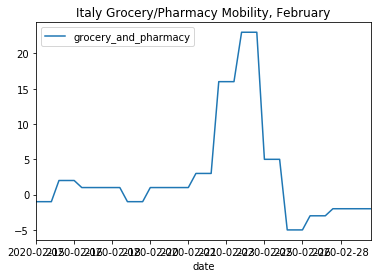

In [1337]:
# Let's see what the grocery/pharmacy trends look like over time now
italy_feb_df.plot("date", "grocery_and_pharmacy", title="Italy Grocery/Pharmacy Mobility, February")

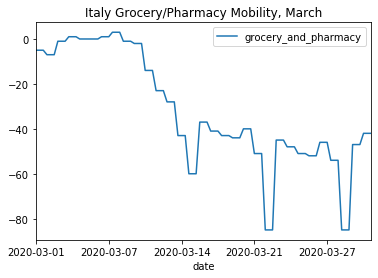

In [1338]:
italy_march_df.plot("date", "grocery_and_pharmacy", title="Italy Grocery/Pharmacy Mobility, March")

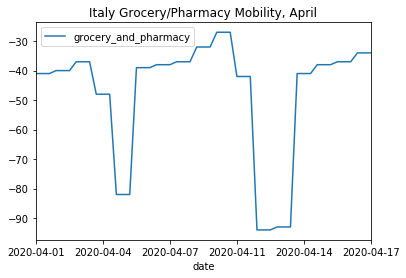

In [1339]:
italy_april_df.plot("date", "grocery_and_pharmacy", title="Italy Grocery/Pharmacy Mobility, April")

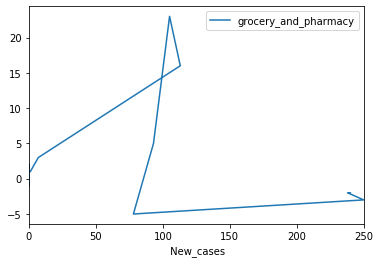

In [1340]:
# There are still multiple entries for each date, but this makes things easier to see.
# Now let's look at correlation between grocery/pharmacy visits and new cases.
italy_feb_df.plot(" New_cases", "grocery_and_pharmacy")

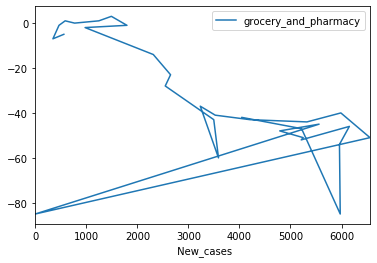

In [1341]:
italy_march_df.plot(" New_cases", "grocery_and_pharmacy")

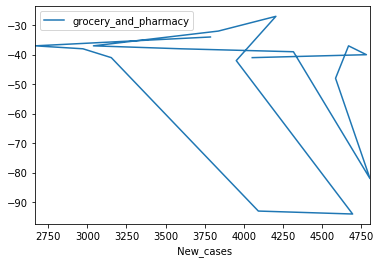

In [1342]:
italy_april_df.plot(" New_cases", "grocery_and_pharmacy")

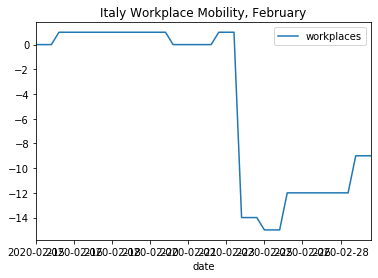

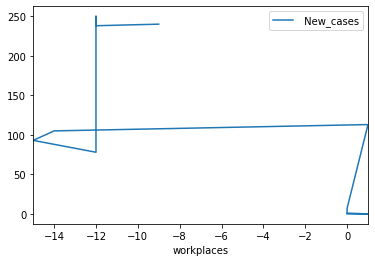

In [1343]:
# Let's try workplaces
italy_feb_df.plot("date", "workplaces", title="Italy Workplace Mobility, February")
italy_feb_df.plot("workplaces", " New_cases")

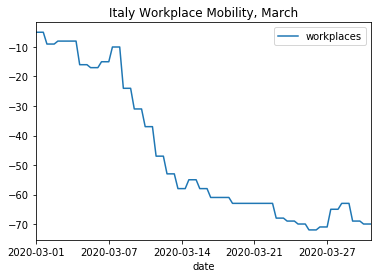

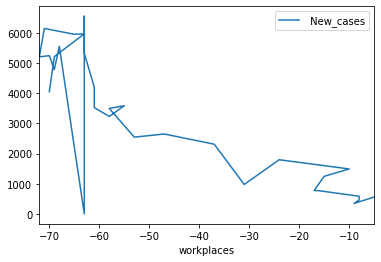

In [1344]:
italy_march_df.plot("date", "workplaces", title="Italy Workplace Mobility, March")
italy_march_df.plot("workplaces", " New_cases")

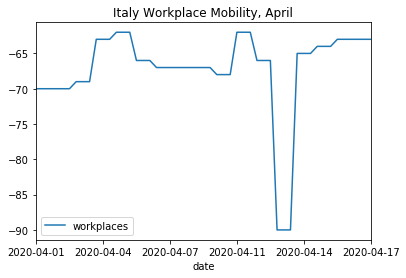

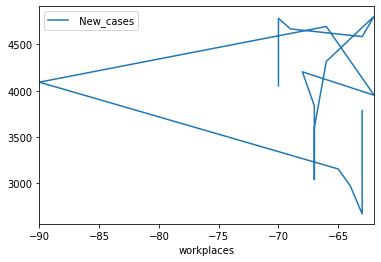

In [1345]:
italy_april_df.plot("date", "workplaces", title="Italy Workplace Mobility, April")
italy_april_df.plot("workplaces", " New_cases")

In [1346]:
# TODO: Account for weekends when analyzing workplace movement data (and possibly also transit station data)

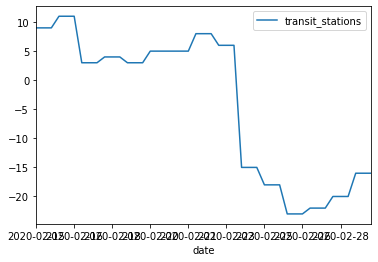

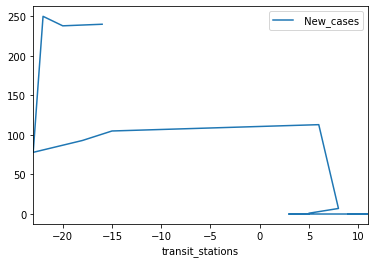

In [1347]:
# Let's try with transit stations now.
italy_feb_df.plot("date", "transit_stations")
italy_feb_df.plot("transit_stations", " New_cases")

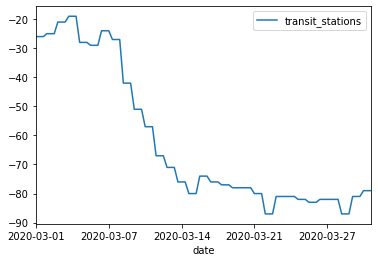

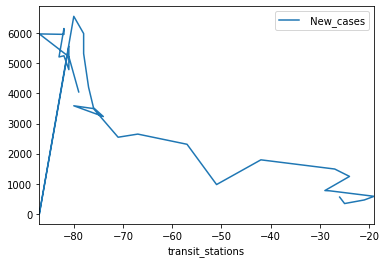

In [1348]:
italy_march_df.plot("date", "transit_stations")
italy_march_df.plot("transit_stations", " New_cases")

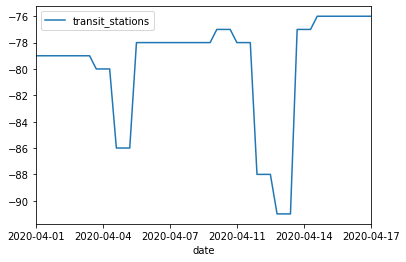

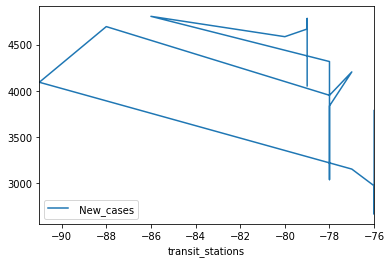

In [1349]:
italy_april_df.plot("date", "transit_stations")
italy_april_df.plot("transit_stations", " New_cases")

In [1350]:
# So far, I'm seeing the greatest correlation between mobility and new cases in Italy during the month of March (makes sense to me)

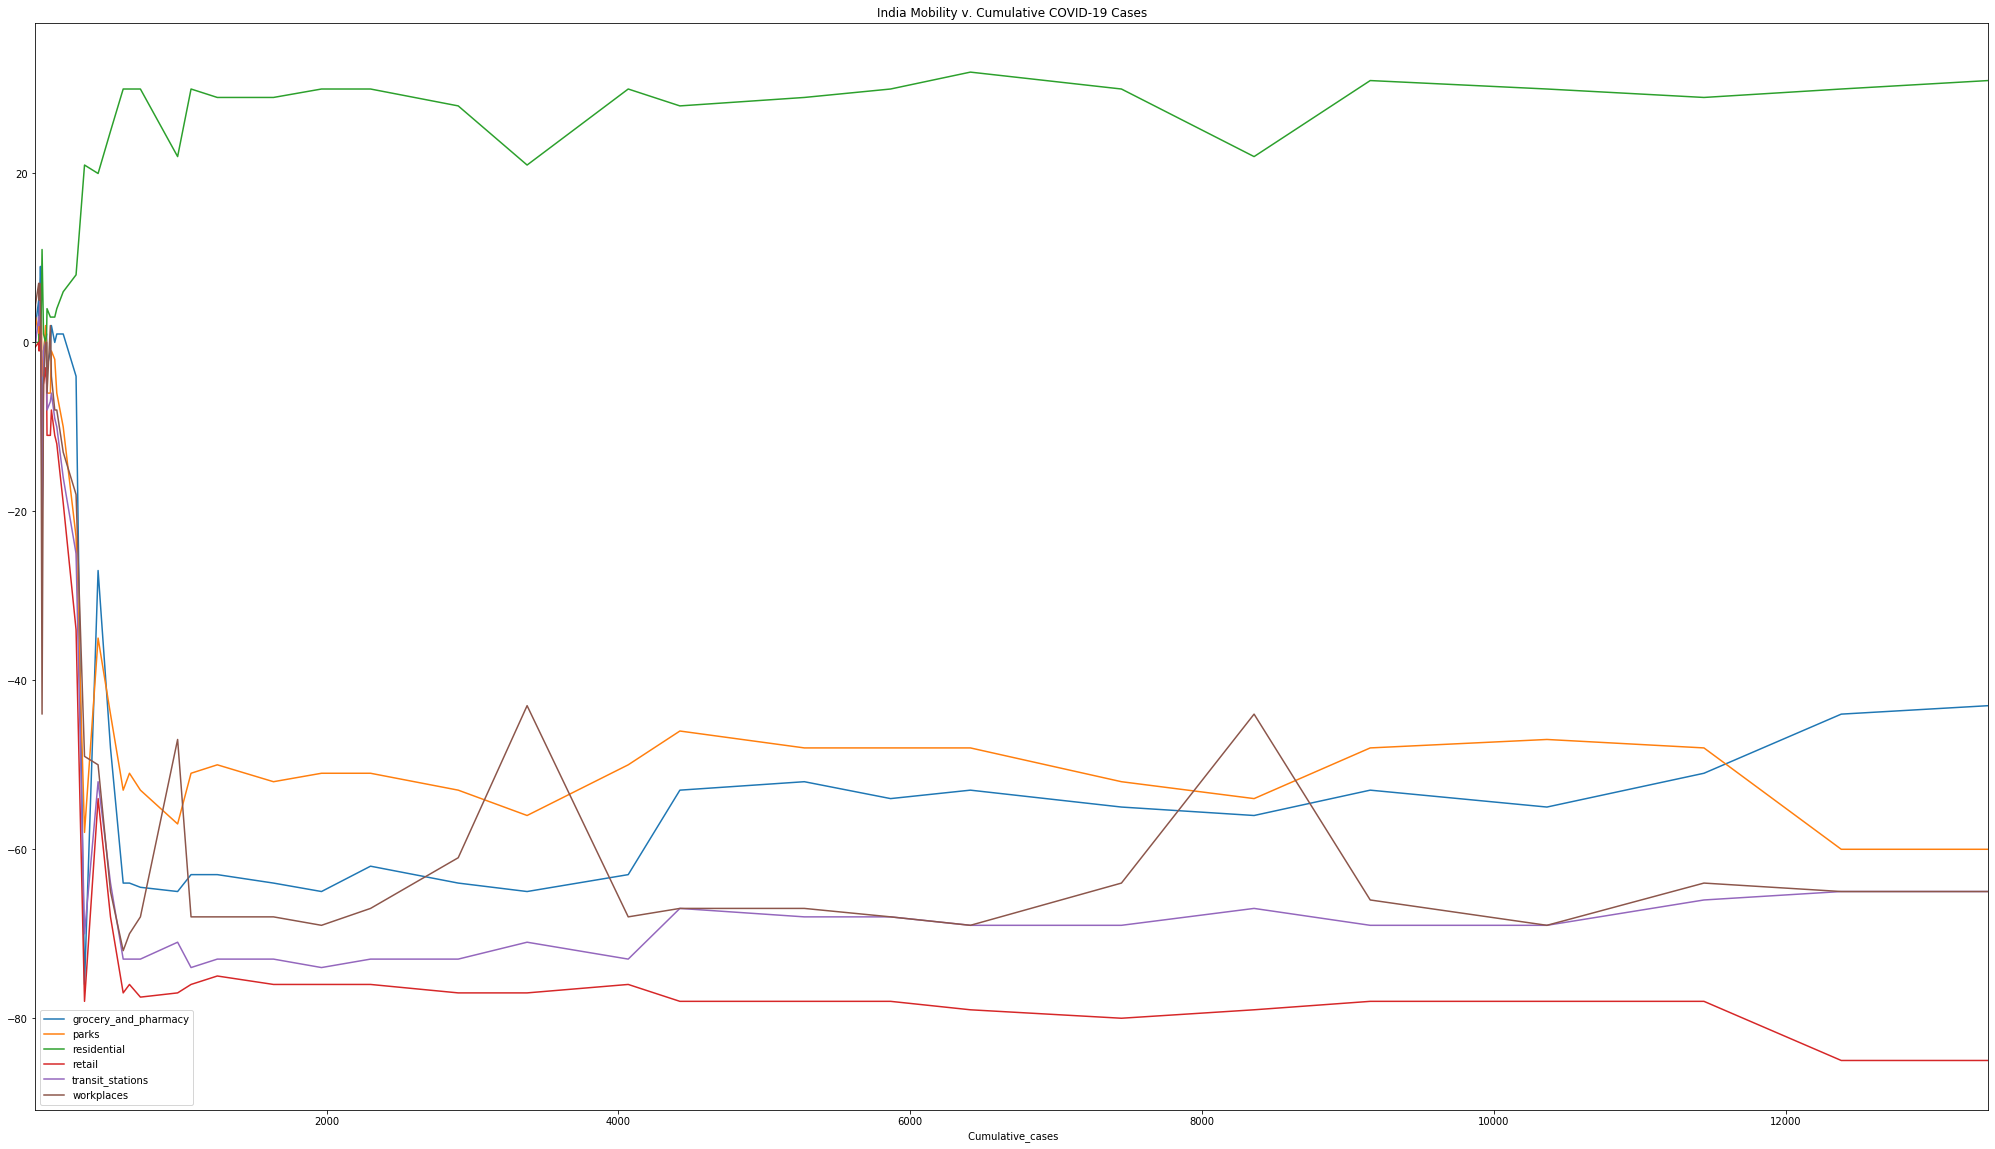

In [1374]:
# Let's see if we can find any countries where mobility corresponds more clearly to COVID rates
# We can check just the 10 largest countries in the dataset

india_df = mobility_df[mobility_df["country"].str.contains("India")]
# Let's format our dataframe the same way we did the earlier DF for all countries combined, but this time using cumulative cases instead of time
india_df = india_df.sort_index(level=[" Cumulative_cases"])
india_df = india_df.groupby([' Cumulative_cases']).mean()
# Let's remove the "value" column and COVID case/death columns so that we can just see the different modes of mobility
india_df = india_df[india_df.columns.difference(['value', " Cumulative_deaths", " New_cases", " New_deaths"])]

# Now, we repeat this process for each of the remaining top-10 countries
indonesia_df = mobility_df[mobility_df["country"].str.contains("Indonesia")]
indonesia_df = indonesia_df.sort_index(level=[" Cumulative_cases"])
indonesia_df = indonesia_df.groupby([' Cumulative_cases']).mean()
indonesia_df = indonesia_df[indonesia_df.columns.difference(['value', " Cumulative_deaths", " New_cases", " New_deaths"])]

brazil_df = mobility_df[mobility_df["country"].str.contains("Brazil")]
brazil_df = brazil_df.sort_index(level=[" Cumulative_cases"])
brazil_df = brazil_df.groupby([' Cumulative_cases']).mean()
brazil_df = brazil_df[brazil_df.columns.difference(['value', " Cumulative_deaths", " New_cases", " New_deaths"])]

mexico_df = mobility_df[mobility_df["country"].str.contains("Mexico")]
mexico_df = mexico_df.sort_index(level=[" Cumulative_cases"])
mexico_df = mexico_df.groupby([' Cumulative_cases']).mean()
mexico_df = mexico_df[mexico_df.columns.difference(['value', " Cumulative_deaths", " New_cases", " New_deaths"])]

japan_df = mobility_df[mobility_df["country"].str.contains("Japan")]
japan_df = japan_df.sort_index(level=[" Cumulative_cases"])
japan_df = japan_df.groupby([' Cumulative_cases']).mean()
japan_df = japan_df[japan_df.columns.difference(['value', " Cumulative_deaths", " New_cases", " New_deaths"])]

philippines_df = mobility_df[mobility_df["country"].str.contains("Philippines")]
philippines_df = philippines_df.sort_index(level=[" Cumulative_cases"])
philippines_df = philippines_df.groupby([' Cumulative_cases']).mean()
philippines_df = philippines_df[philippines_df.columns.difference(['value', " Cumulative_deaths", " New_cases", " New_deaths"])]

egypt_df = mobility_df[mobility_df["country"].str.contains("Egypt")]
egypt_df = egypt_df.sort_index(level=[" Cumulative_cases"])
egypt_df = egypt_df.groupby([' Cumulative_cases']).mean()
egypt_df = egypt_df[egypt_df.columns.difference(['value', " Cumulative_deaths", " New_cases", " New_deaths"])]

turkey_df = mobility_df[mobility_df["country"].str.contains("Turkey")]
turkey_df = turkey_df.sort_index(level=[" Cumulative_cases"])
turkey_df = turkey_df.groupby([' Cumulative_cases']).mean()
turkey_df = turkey_df[turkey_df.columns.difference(['value', " Cumulative_deaths", " New_cases", " New_deaths"])]

germany_df = mobility_df[mobility_df["country"].str.contains("Germany")]
germany_df = germany_df.sort_index(level=[" Cumulative_cases"])
germany_df = germany_df.groupby([' Cumulative_cases']).mean()
germany_df = germany_df[germany_df.columns.difference(['value', " Cumulative_deaths", " New_cases", " New_deaths"])]

thailand_df = mobility_df[mobility_df["country"].str.contains("Thailand")]
thailand_df = thailand_df.sort_index(level=[" Cumulative_cases"])
thailand_df = thailand_df.groupby([' Cumulative_cases']).mean()
thailand_df = thailand_df[thailand_df.columns.difference(['value', " Cumulative_deaths", " New_cases", " New_deaths"])]

# Finally, we can plot the data for these 10 countries
india_df.plot(figsize=(35,20), title="India Mobility v. Cumulative COVID-19 Cases")
indonesia_df.plot(figsize=(35,20), title="Indonesia Mobility v. Cumulative COVID-19 Cases")
brazil_df.plot(figsize=(35,20), title="Brazil Mobility v. Cumulative COVID-19 Cases")
mexico_df.plot(figsize=(35,20), title="Mexico Mobility v. Cumulative COVID-19 Cases")
japan_df.plot(figsize=(35,20), title="Japan Mobility v. Cumulative COVID-19 Cases")
philippines_df.plot(figsize=(35,20), title="The Philippines Mobility v. Cumulative COVID-19 Cases")
egypt_df.plot(figsize=(35,20), title="Egypt Mobility v. Cumulative COVID-19 Cases")
turkey_df.plot(figsize=(35,20), title="Turkey Mobility v. Cumulative COVID-19 Cases")
germany_df.plot(figsize=(35,20), title="Germany Mobility v. Cumulative COVID-19 Cases")
thailand_df.plot(figsize=(35,20), title="Thailand Mobility v. Cumulative COVID-19 Cases")



---


## Plotting the data - Restaurants

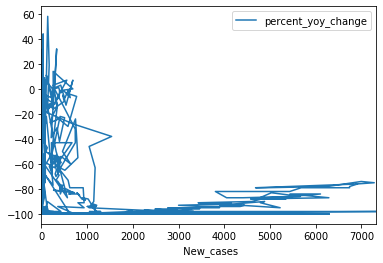

In [1352]:
# Let's start out plotting correlation between restaurant performance and new cases of COVID-19
# Note that this is on a global scale (we can break it up by country later)
restaurant_df.plot(" New_cases", "percent_yoy_change")

Looks like restaurant performance was generally higher when the number of new cases in a given country was below 1,000. However, this could be due to mandatory restaurant closures at a certain date.

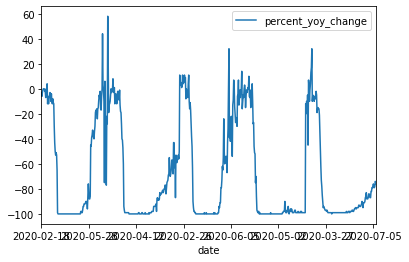

In [1353]:
# Let's see how restaurant performace changed over time instead
restaurant_df.plot("date", "percent_yoy_change")

Now we get 5 spikes. I wonder if each spike reflects restaurant closures in each of the 5 countries included in the dataset? Let's look at the countries individually.

In [1354]:
# Let's break this up into 5 dataframes, one for each country
aus_df = restaurant_df[restaurant_df["country"].str.contains("Australia")]
can_df = restaurant_df[restaurant_df["country"].str.contains("Canada")]
ger_df = restaurant_df[restaurant_df["country"].str.contains("Germany")]
ire_df = restaurant_df[restaurant_df["country"].str.contains("Ireland")]
mex_df = restaurant_df[restaurant_df["country"].str.contains("Mexico")]

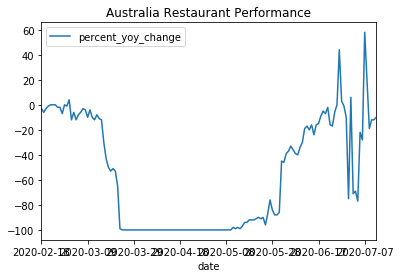

In [1355]:
# Now, let's see how restaurant performance changed over time in each individual country

aus_df.plot("date", "percent_yoy_change", title="Australia Restaurant Performance")

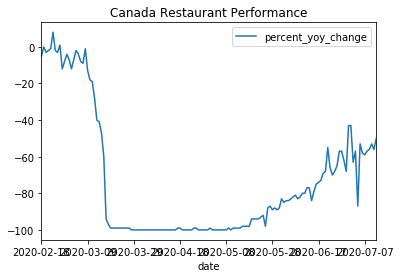

In [1356]:
can_df.plot("date", "percent_yoy_change", title="Canada Restaurant Performance")

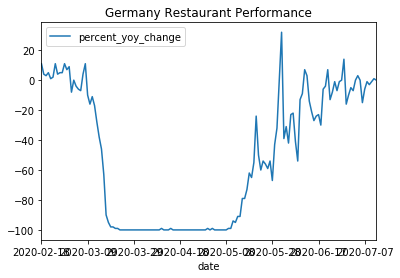

In [1357]:
ger_df.plot("date", "percent_yoy_change", title="Germany Restaurant Performance")

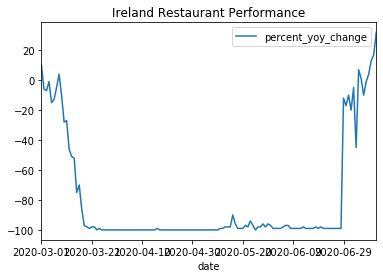

In [1358]:
ire_df.plot("date", "percent_yoy_change", title="Ireland Restaurant Performance")

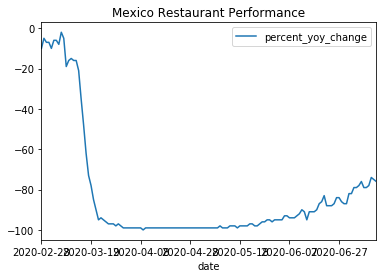

In [1359]:
mex_df.plot("date", "percent_yoy_change", title="Mexico Restaurant Performance")

In these plots, we can see high performance on earlier dates, followed by a steep decline (presumably due to mandatory restaurant closures), a low plateau, and then an increase at later dates (possibly due to restaurant reopenings, or maybe increasing business through alternative avenues like takeout).

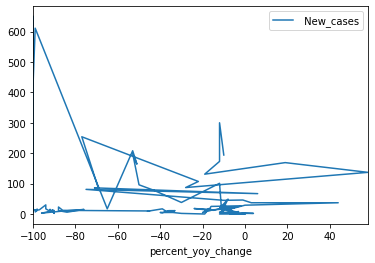

In [1360]:
# Now, let's see if these dips in restaurant performance (possibly due to mandatory closures) had any correlation with the number of new COVID cases in each individual country

aus_df.plot("percent_yoy_change", " New_cases")

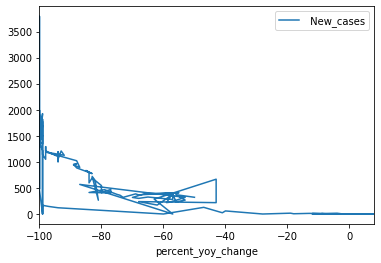

In [1361]:
can_df.plot("percent_yoy_change", " New_cases")

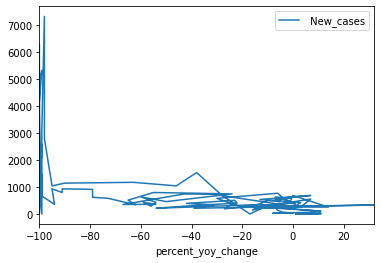

In [1362]:
ger_df.plot("percent_yoy_change", " New_cases")

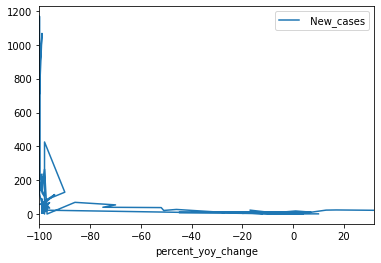

In [1363]:
ire_df.plot("percent_yoy_change", " New_cases")

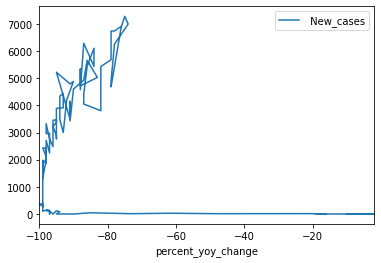

In [1364]:
mex_df.plot("percent_yoy_change", " New_cases")

Interestingly, the number of new cases seems to decrease as restaurant business increases. This is most likely due to the fact that restaurants closed when new case rates were high, and then slowly reopened as new case numbers began to decrease. Let's try looking at total cases instead.

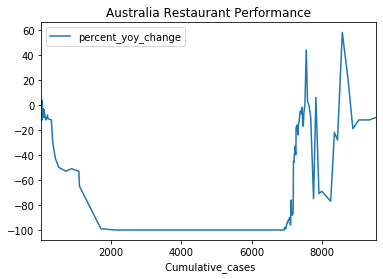

In [1365]:
aus_df.plot(" Cumulative_cases", "percent_yoy_change", title="Australia Restaurant Performance")

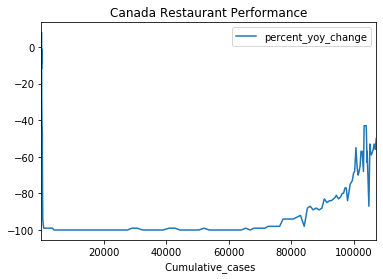

In [1366]:
can_df.plot(" Cumulative_cases", "percent_yoy_change", title="Canada Restaurant Performance")

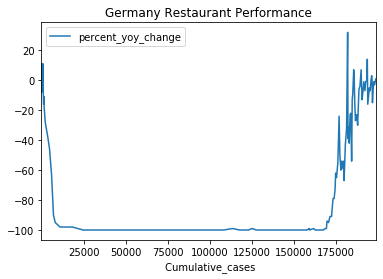

In [1367]:
ger_df.plot(" Cumulative_cases", "percent_yoy_change", title="Germany Restaurant Performance")

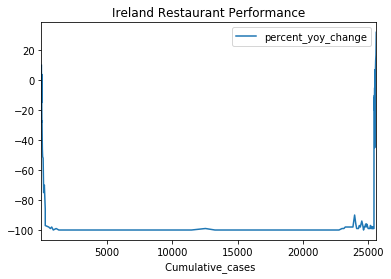

In [1368]:
ire_df.plot(" Cumulative_cases", "percent_yoy_change", title="Ireland Restaurant Performance")

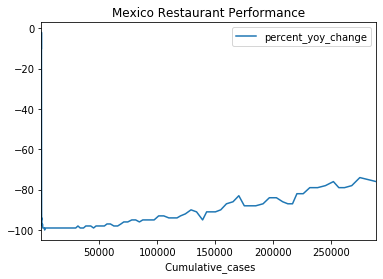

In [1369]:
mex_df.plot(" Cumulative_cases", "percent_yoy_change", title="Mexico Restaurant Performance")

The above plots all have similar shapes. This is unsurprising, as restaurant business was best when cumulative cases were very low (before the worst of the pandemic and mandatory closures) and when cumulative cases were at their highest (towards the end of the worst of the pandemic, when restaurants were allowed to reopen).

[]

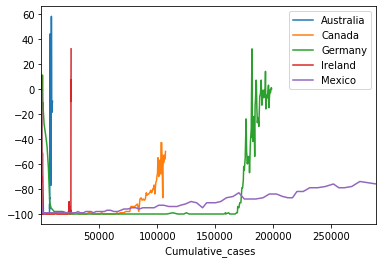

In [1370]:
# Let's compare individual countries with respect to cumulative cases and restaurant performance change
ax = aus_df.plot(" Cumulative_cases", "percent_yoy_change")
ax = can_df.plot(" Cumulative_cases", "percent_yoy_change", ax=ax)
ax = ger_df.plot(" Cumulative_cases", "percent_yoy_change", ax=ax)
ax = ire_df.plot(" Cumulative_cases", "percent_yoy_change", ax=ax)
ax = mex_df.plot(" Cumulative_cases", "percent_yoy_change", ax=ax)

ax.legend(['Australia', 'Canada', 'Germany', 'Ireland', 'Mexico'])
ax.plot(figsize=(60,40))

[]

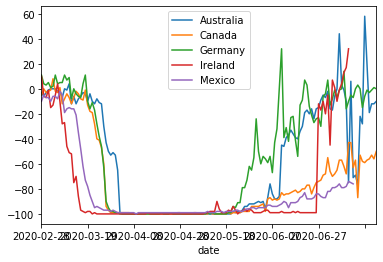

In [1371]:
# And now a time series comparison between the countries
ax = aus_df.plot("date", "percent_yoy_change")
ax = can_df.plot("date", "percent_yoy_change", ax=ax)
ax = ger_df.plot("date", "percent_yoy_change", ax=ax)
ax = ire_df.plot("date", "percent_yoy_change", ax=ax)
ax = mex_df.plot("date", "percent_yoy_change", ax=ax)

ax.legend(['Australia', 'Canada', 'Germany', 'Ireland', 'Mexico'])
ax.plot(figsize=(60,40))

[]

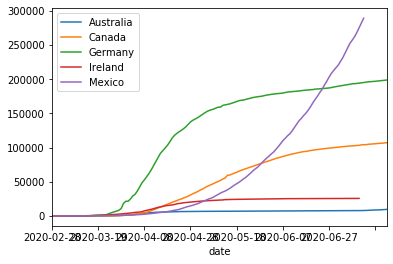

In [1372]:
# Now, let's compare cumulative cases across the countries over time
ax = aus_df.plot("date", " Cumulative_cases")
ax = can_df.plot("date", " Cumulative_cases", ax=ax)
ax = ger_df.plot("date", " Cumulative_cases", ax=ax)
ax = ire_df.plot("date", " Cumulative_cases", ax=ax)
ax = mex_df.plot("date", " Cumulative_cases", ax=ax)

ax.legend(['Australia', 'Canada', 'Germany', 'Ireland', 'Mexico'])
ax.plot(figsize=(60,40))